# Trabalho 3 - Redes Neurais

Trabalho para compor nota da disciplina Aprendizado de Máquina, pertecente à ementa do curso de mestrado pertencente ao Programa de Pós Graduação em Ciência da Computação, pelo Cefet-RJ.

Prof.: Eduardo Bezerra
    
Aluna: Francimary Garcia
    
Entrega: 20/11/2017

# 1 Redes Completamente Conectadas


Uma instituição ﬁnanceira possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja criar um modelo de classiﬁcação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. 

O conjunto de dados possui 1500 exemplos de créditos concedidos aos seus clientes. Esses registros estão contidos no arquivo credtrain.txt, que é fornecido juntamente com esse documento. Para cada cliente, são deﬁnidos 11 atributos (variáveis, características). Aléem disso, a última coluna de cada exemplo informa se o cliente honrou ou não o pagamento do empréstimo. 

Nesta parte, você deve criar um modelo de classiﬁcação, por meio de uma rede neural de múltiplas camadas com propagação do erro (error backpropagation). O objetivo desse modelo de classiﬁcação é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Esse modelo deve ser criado com o uso de funções e classes fornecidas pelo Keras.


In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os 
import scipy.optimize as opt  
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(4)

from sklearn.metrics import confusion_matrix


# 1.1 Um Exemplo Introdutório

Usar os dados das matrizes P e T fornecidas para criar de um modelo de classiﬁcação em um exemplo pequeno que possa ser aplicado a um exemplo maior. 

In [89]:

P = np.array([[0.4046, 0.3786, 0.7010, 0.8608],[0.9974, 0.8479, 0.6201, 0.4031],[0.3764, 0.9214, 0.9331, 0.7514],[0.6943, 0.3494, 0.1438, 0.6035]])
print(P.shape)
print(P)

T = np.array([0,1,0,1])
print(T.shape)
print(T)

(4, 4)
[[ 0.4046  0.3786  0.701   0.8608]
 [ 0.9974  0.8479  0.6201  0.4031]
 [ 0.3764  0.9214  0.9331  0.7514]
 [ 0.6943  0.3494  0.1438  0.6035]]
(4,)
[0 1 0 1]


In [91]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [93]:
# Fit the model
history = model.fit(P, T, validation_split=0.33, epochs=1000, batch_size=10, verbose=0)


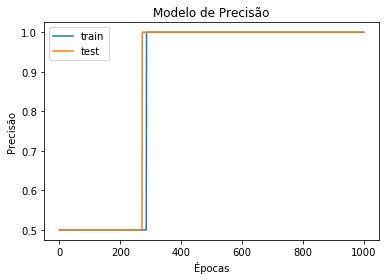

In [94]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de Precisão')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

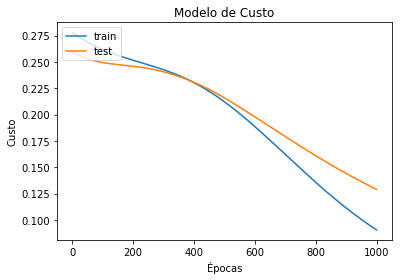

In [95]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Custo')
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1.2 Criação de modelo de predição de crédito

As duas bases de dados serão lidas: Treinamento e Teste.
    
Os dados da base de treinamento serão embaralhados para prevenir qualquer padrão de agrupamento existente.

In [297]:
# fix random seed for reproducibility
numpy.random.seed(11)

dataset = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtrain.csv", delimiter=";")

dataset2 = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtest.csv", delimiter=";")

#Normalizing data, dont work with dataset
#dataset = (dataset - dataset.mean()) / dataset.std()
#print(dataset)

np.random.shuffle(dataset)



Os campos das bases de dados serão armazenados em duas matrizes, X e X2 para as características e Y e Y2 para a classe.

In [298]:
# split into input (X) and output (Y) variables=====>TRAIN DATASET
X = dataset[:,0:11]
Y = dataset[:,11]
print("Dataset de Treinamento:")
print(dataset.shape)
# Train matrix
print(X.shape)
# Target matrix
print(Y.shape)
#print(dataset)

# split into input (X2) and output (Y2) variables=====>TEST DATASET
X2 = dataset2[:,0:11]
Y2 = dataset2[:,11]
print("Dataset de Teste:")
print(dataset2.shape)
# Train matrix
print(X2.shape)
# Target matrix
print(Y2.shape)
#print(dataset)

Dataset de Treinamento:
(1500, 12)
(1500, 11)
(1500,)
Dataset de Teste:
(577, 12)
(577, 11)
(577,)


Crie uma rede neural artiﬁcial completamente conectada de uma única camada oculta, com 3 neurônios nessa camada oculta e 1 neurônio na camada de saída. Em ambas as camadas, a função de ativação deve ser a função sigmoide logística.


Algumas execuções foram realizadas alterando o número de neurônios da camada intermediária e a princípio esta configuração com 5 neurônios apresentou uma precisão maior e mais acertos na matriz de confusão.

In [300]:
# create model
model = Sequential()
model.add(Dense(5, input_dim=11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


Realize a conﬁguração da rede recém-criada, conforme instruções a seguir. Quantidade de épocas igual a 100.000; Função de perda: soma dos erros quadrados; método de otimização: gradiente descendente estocástico.

In [301]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Treine a rede neural. Esse é o passo em que os pesos e os limiares da rede são ajustados. Esse passo deve ser realizado com a função fit da classe Model. Para chamar essa função, devemos passar à rede, a matriz de padrões e a matriz de alvos.


In [302]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=1000, batch_size=10, verbose=0, validation_data=(X2, Y2))



Gere gráﬁcos para visualizar o histórico de treinamento. Em particular, gere curvas da precisão e da função de custo contra a quantidade de épocas de treinamento.

Abaixo os valores armazenados na função History, durante o treinamento do modelo.

In [303]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


### Gráfico que compara Precisão com Épocas de Treinamento

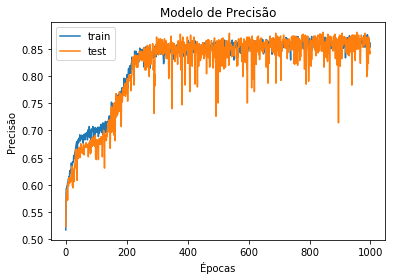

In [304]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de Precisão')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pelo gráfico acima podemos observar uma tendência de elevação da precisão muito próxima entre as duas bases, seguida de uma estagnação no nível de precisão entre as bases de treinamento e teste

### Gráfico que compara Custo com Épocas de Treinamento


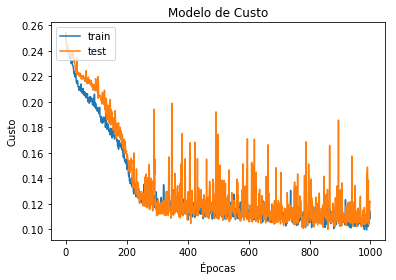

In [305]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Custo')
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pelo gráfico acima podemos perceber um comportamento bastante similar entre as duas bases, onde houve um início do treinamento com um custo elevado, ao longo das épocas o custo foi reduzido, atingindo também uma certa estagnação.

Abaixo, o modelo calculará as predições de classe para o dataset de treinamento.

In [309]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,

A matriz de confusão será calculada, mostrando na primeira linha: True Positive e False Positive e na segunda linha False Negative e True Negative, nesta ordem.

In [310]:
# Confusion matrix 

expected = Y
predicted = rounded
results = confusion_matrix(expected, predicted)
print(results)

[[769  16]
 [215 500]]


O modelo será avaliado, exibindo a precisão encontrada.

In [312]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1500/1500 [==============================] - 0s 89us/step

acc: 84.60%


O modelo conseguirá acertar com 84,6% de precisão, se um novo cliente honrará ou não o empréstimo requisitado.

# 2 Redes Convolucionais


Nesta parte, você irá treinar modelos de redes neurais artiﬁciais para classiﬁcar imagens. Em particular, dada uma imagem, seus modelos deverão indicar se a imagem contém um gato ou não. São fornecidos os conjuntos de imagens para treinamento e para teste (arquivos train_catvnoncat.h5 e test_catvnoncat.h5).

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import scipy.io
from PIL import Image
from scipy import ndimage


Função de leitura das bases de treinamento e teste.

In [291]:
      
def load_dataset():
    
    arquivo = 'C:\\temp\\traincatvnoncat.h5' 
       
   
    train_dataset = h5py.File(arquivo, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features                      
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    arquivo2 = 'C:\\temp\\test_catvnoncat.h5' 
    test_dataset = h5py.File(arquivo2, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [292]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [293]:
print("Dataset de treinamento:")
print("São 209 imagens de tamanho 64X64 pixels e 3 canais(RGB)")
print(train_set_x_orig.shape)
print(train_set_y.shape)

print("Dataset de teste:")
print("São 50 imagens de tamanho 64X64 pixels e 3 canais (RGB)")
print(test_set_x_orig.shape)
print(test_set_y.shape)

print("Classes:") # cat or non-cat
print(classes.shape)


Dataset de treinamento:
São 209 imagens de tamanho 64X64 pixels e 3 canais(RGB)
(209, 64, 64, 3)
(1, 209)
Dataset de teste:
São 50 imagens de tamanho 64X64 pixels e 3 canais (RGB)
(50, 64, 64, 3)
(1, 50)
Classes:
(2,)


### Abaixo dois exemplos de figuras existentes no dataset de treinamento fornecido com sua classificação:

y = [1], é a figura de um: cat


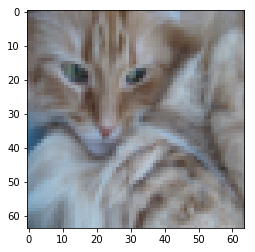

In [294]:
# Example of a picture
index = 2
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", é a figura de um: " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

y = [0], é a figura de um: non-cat


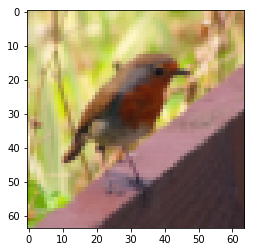

In [295]:
# Example of a picture
index = 10
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", é a figura de um: " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

Após ler os conjuntos de dados, você deve treinar dois modelos utilizando o Keras, conforme descrito a seguir:

• Uma rede completamente conectada de uma única camada oculta e com uma camada de saída de duas unidades com softmax.

• Uma rede convolucional.

Em ambos os casos acima, você deverá selecionar os hiperparâmetros e arquitetura de rede. Procure se basear nos exemplos de código e nas arquiteturas de rede apresentadas em aula. Em seu relatório, apresente os detalhes acerca da deﬁnição de cada uma dessas redes, assim como o desempenho encontrado em cada um dos casos.


Após a importação dos conjuntos de dados, a função de forma será usada para garantir a dimensão do treinamento e do conjunto de testes. Além disso, para padronizar ainda mais o conjunto de dados, em vez de ter os canais vermelho, verde e azul (RGB) para cada pixel, nós o normalizaremos tomando o valor médio, dividindo cada linha do conjunto de dados por 255 (o valor máximo de um canal de pixel).

In [296]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

## standardize dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


# Modelo de Rede Convolucional 

Foram criadas duas funções auxiliares sigmoid: usada para calcular a função de ativação e a função de iniciação: usada para inicializar pesos e polarização para os nós de entrada.

In [297]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = None
    s = 1/(1 + np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

O passo de propagação será criado utilizando as funções auxiliares acima.

In [298]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                     # compute activation
    cost = - 1/m * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))    # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

Os parâmetros serão atualizados com base nos resultados do Forward propagation e Backward propagation.

In [299]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Dado que temos um modelo treinado, podemos usá-lo para prever os rótulos com novos exemplos de dados:

In [300]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Dado que temos a capacidade de treinar nossos modelos atualizando os parâmetros, e temos a capacidade de prever com o conjunto de dados recém-fornecido, podemos então construir nosso modelo de regressão logística.

In [301]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])  # where to get dimension?

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Usando os dados importados inicialmente, veremos o funcionamento.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

------------

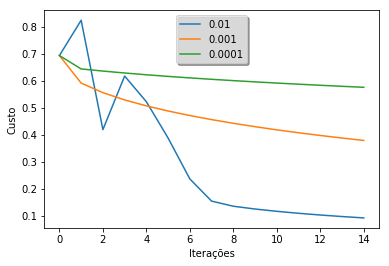

In [302]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('Custo')
plt.xlabel('Iterações')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Diferentes taxas de aprendizagem resultam diferentes custos e, portanto diferentes resultados de previsões.

Se a taxa de aprendizado for muito grande (0,01), o custo pode oscilar para cima e para baixo. Pode até divergir (embora neste exemplo, o uso de 0,01 ainda acabe por ter um bom valor para o custo).
Um custo menor não significa um modelo melhor. Deve-se verificar se há possivelmente superação. Isso ocorre quando a precisão do treino é muito maior do que a precisão do teste.
Na aprendizagem profunda, geralmente recomenda-se a escolha da taxa de aprendizado que melhor minimiza a função de custo.


### Testando o modelo treinado com uma imagem qualquer:

y = 1.0, o algoritmo prediz que a figura é: cat


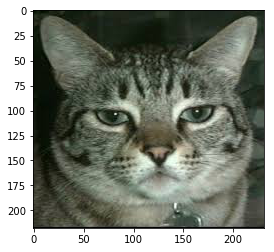

In [303]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 

my_image = 'C:\\temp\\cat2.jpg' 

num_px = 64
fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo prediz que a figura é: " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

y = 0.0, o algoritmo prediz que a figura é: non-cat


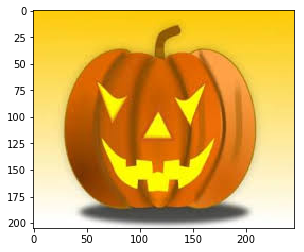

In [304]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 

my_image = 'C:\\temp\\noncat.jpg'  

num_px = 64
fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo prediz que a figura é: " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

# Rede Neural Completamente Conectada

Para o mesmo conjunto de dados de identificação de gatos, será treinado um modelo de rede neural completamente conectada.

Criar  uma rede completamente conectada de uma única camada oculta e com uma camada de saída de duas unidades com softmax. 

In [305]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


batch_size = 128
num_classes = 2
epochs = 200

flatten_x_train = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1))
flatten_x_test = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1))


# convert class vectors to binary class matrices
train_set_y = keras.utils.to_categorical(train_set_y, num_classes)
test_set_y = keras.utils.to_categorical(test_set_y, num_classes)


model = Sequential()
ini = keras.initializers.RandomNormal(seed = 656)
model.add(Dense(5, input_shape=flatten_x_train.shape[1:], kernel_initializer=ini, use_bias= True, activation='relu' ))
model.add(Dense(10, activation='sigmoid', use_bias= True))
model.add(Dense(2, activation='softmax'))

opcao = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(flatten_x_train, train_set_y,validation_split=0.33,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,validation_data=(flatten_x_test, test_set_y))          
#validation_data=(test_set_x, test_set_y)
score = model.evaluate(flatten_x_test, test_set_y, verbose=0)
print('Custo do Teste:', score[0])
print('Precisão do Teste:', score[1])

Train on 209 samples, validate on 50 samples
Epoch 1/200
209/209 [==============================] - 2s 9ms/step - loss: 1.4219 - acc: 0.3445 - val_loss: 0.6701 - val_acc: 0.6600
Epoch 2/200
209/209 [==============================] - 0s 378us/step - loss: 0.8491 - acc: 0.3445 - val_loss: 0.6699 - val_acc: 0.6600
Epoch 3/200
209/209 [==============================] - 0s 402us/step - loss: 0.8450 - acc: 0.3493 - val_loss: 0.6677 - val_acc: 0.6600
Epoch 4/200
209/209 [==============================] - 0s 350us/step - loss: 0.8403 - acc: 0.3493 - val_loss: 0.6683 - val_acc: 0.6600
Epoch 5/200
209/209 [==============================] - 0s 354us/step - loss: 0.8375 - acc: 0.3493 - val_loss: 0.6690 - val_acc: 0.6600
Epoch 6/200
209/209 [==============================] - 0s 397us/step - loss: 0.8348 - acc: 0.3493 - val_loss: 0.6696 - val_acc: 0.6600
Epoch 7/200
209/209 [==============================] - 0s 354us/step - loss: 0.8320 - acc: 0.3493 - val_loss: 0.6703 - val_acc: 0.6600
Epoch 8/200


Epoch 61/200
209/209 [==============================] - 0s 254us/step - loss: 0.7145 - acc: 0.3445 - val_loss: 0.6923 - val_acc: 0.6600
Epoch 62/200
209/209 [==============================] - 0s 273us/step - loss: 0.7131 - acc: 0.3445 - val_loss: 0.6933 - val_acc: 0.6600
Epoch 63/200
209/209 [==============================] - 0s 278us/step - loss: 0.7118 - acc: 0.3445 - val_loss: 0.6943 - val_acc: 0.6600
Epoch 64/200
209/209 [==============================] - 0s 287us/step - loss: 0.7104 - acc: 0.3445 - val_loss: 0.6953 - val_acc: 0.6600
Epoch 65/200
209/209 [==============================] - 0s 273us/step - loss: 0.7091 - acc: 0.3445 - val_loss: 0.6963 - val_acc: 0.6600
Epoch 66/200
209/209 [==============================] - 0s 426us/step - loss: 0.7078 - acc: 0.3445 - val_loss: 0.6974 - val_acc: 0.6600
Epoch 67/200
209/209 [==============================] - 0s 297us/step - loss: 0.7064 - acc: 0.3445 - val_loss: 0.6984 - val_acc: 0.6600
Epoch 68/200
209/209 [==========================

209/209 [==============================] - 0s 158us/step - loss: 0.6615 - acc: 0.6555 - val_loss: 0.7582 - val_acc: 0.3200
Epoch 122/200
209/209 [==============================] - 0s 163us/step - loss: 0.6610 - acc: 0.6555 - val_loss: 0.7594 - val_acc: 0.3200
Epoch 123/200
209/209 [==============================] - 0s 163us/step - loss: 0.6605 - acc: 0.6555 - val_loss: 0.7606 - val_acc: 0.3200
Epoch 124/200
209/209 [==============================] - 0s 163us/step - loss: 0.6600 - acc: 0.6555 - val_loss: 0.7617 - val_acc: 0.3200
Epoch 125/200
209/209 [==============================] - 0s 168us/step - loss: 0.6596 - acc: 0.6555 - val_loss: 0.7630 - val_acc: 0.3200
Epoch 126/200
209/209 [==============================] - 0s 187us/step - loss: 0.6591 - acc: 0.6555 - val_loss: 0.7644 - val_acc: 0.3200
Epoch 127/200
209/209 [==============================] - 0s 163us/step - loss: 0.6586 - acc: 0.6555 - val_loss: 0.7657 - val_acc: 0.3200
Epoch 128/200
209/209 [==============================] 

Epoch 181/200
209/209 [==============================] - 0s 187us/step - loss: 0.6454 - acc: 0.6555 - val_loss: 0.8213 - val_acc: 0.3200
Epoch 182/200
209/209 [==============================] - 0s 163us/step - loss: 0.6451 - acc: 0.6555 - val_loss: 0.8222 - val_acc: 0.3200
Epoch 183/200
209/209 [==============================] - 0s 182us/step - loss: 0.6450 - acc: 0.6555 - val_loss: 0.8229 - val_acc: 0.3200
Epoch 184/200
209/209 [==============================] - 0s 153us/step - loss: 0.6449 - acc: 0.6555 - val_loss: 0.8239 - val_acc: 0.3200
Epoch 185/200
209/209 [==============================] - 0s 172us/step - loss: 0.6448 - acc: 0.6555 - val_loss: 0.8249 - val_acc: 0.3200
Epoch 186/200
209/209 [==============================] - 0s 187us/step - loss: 0.6447 - acc: 0.6555 - val_loss: 0.8256 - val_acc: 0.3200
Epoch 187/200
209/209 [==============================] - 0s 206us/step - loss: 0.6446 - acc: 0.6555 - val_loss: 0.8265 - val_acc: 0.3200
Epoch 188/200
209/209 [==================

#### Observamos no resultado do treinamento do modelo executado acima, um custo elevado 83% para uma precisão baixa 32%. Tal resultado comprova que modelos de redes neurais completamente conectadas(redes densas), não são adequadas para o treinamento de imagens, devido a: Quantidade grande de parâmetros; Por serem Inadequadas a imagens de alta resolução e Pelo tempo necessário para computar as ativações/pré-ativações.


In [306]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


### Gráfico que compara Precisão com Épocas de Treinamento

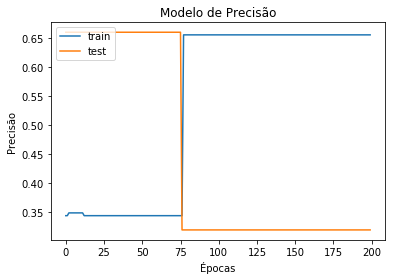

In [307]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de Precisão')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Gráfico que compara Custo com Épocas de Treinamento

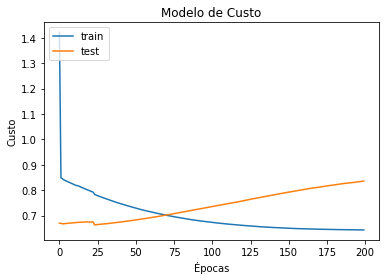

In [308]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Custo')
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Todo o código e bases de dados utilizadas neste trabalho estão armazenadas em :https://github.com/Francimary/Aprendizado-de-M-quina